In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# State wise COVID tests file
df_state = pd.read_csv("StatewiseTestingDetails.csv")


In [3]:
# Total cases in india
df_India = pd.read_csv("covid_19_india.csv")

In [4]:
# Total Vaccination details
df_Tvaccine = pd.read_csv("covid_vaccine_statewise.csv")

In [5]:
#First 5 elements of State Testing
df_state.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [6]:
#First 5 elements of Total vaccine
df_Tvaccine.head()

,Updated On,State,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0


In [7]:
#First 5 elements of Total cases in India
df_India.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [33]:
# grouping the states in df_state file to check the state wise positive cases
df_Spositive = df_state.groupby(["State"]).Positive.sum()


Text(0, 0.5, 'Frequency')

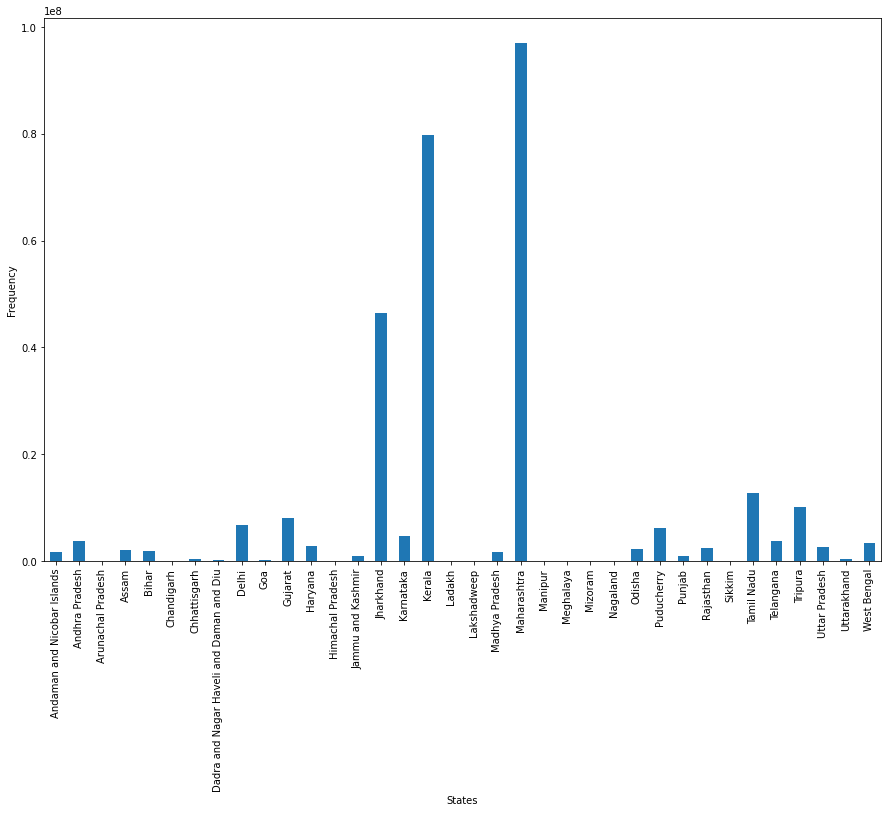

In [34]:
#plotting the result
df_Spositive.plot(kind= "bar", figsize = (15,10))
plt.xlabel('States')
plt.ylabel('Frequency')


In [10]:
#description of nation wide cases

df_India.describe()

,Sno,Cured,Deaths,Confirmed
count,16850.000000,1.685000e+04,16850.000000,1.685000e+04
mean,8425.500000,2.360353e+05,3485.222552,2.583667e+05
std,4864.320353,5.225438e+05,9330.541749,5.672808e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4213.250000,2.658500e+03,22.000000,3.644750e+03
50%,8425.500000,2.889500e+04,453.000000,3.336150e+04
75%,12637.750000,2.537510e+05,3071.250000,2.666530e+05
max,16850.000000,5.872268e+06,123531.000000,6.113335e+06


In [11]:
# creating a new column "Active" to see the active cases of each state

df_India["Active"] = df_India.Confirmed - (df_India.Cured+df_India.Deaths)
df_India.Active.sum()

317557938

In [12]:
#caliculating the sum of deaths
df_India.Deaths.sum()


58726000

In [13]:
#caliculating the sum of cured
df_India.Cured.sum()


3977194136

In [26]:
#Renaming the column for easy access

df_India.rename(columns={"State/UnionTerritory":"State"},inplace=True)

In [27]:
#Statewise Death toll

Deaths_Swise= df_India.groupby("State").Deaths.max().sort_values()

Text(0, 0.5, 'No.of Deaths')

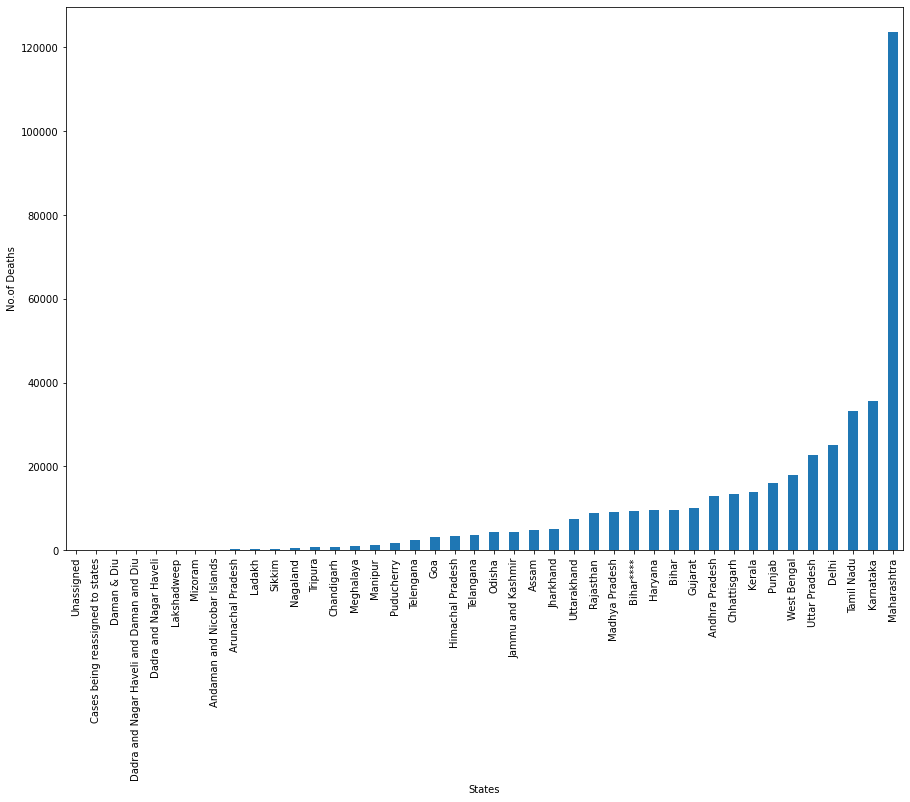

In [29]:
#Representing death toll through graph

Deaths_Swise.plot(kind="bar",figsize=(15,10))
plt.xlabel("States")
plt.ylabel("No.of Deaths")


<AxesSubplot:xlabel='State'>

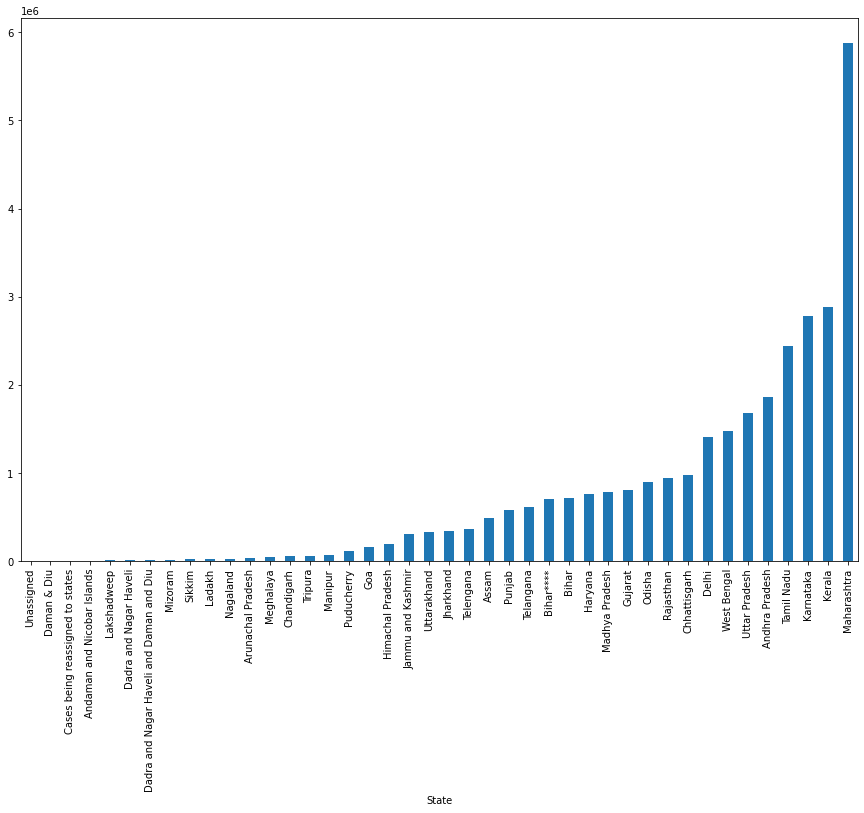

In [54]:
#Cured individuals

Cured_Indi = df_India.groupby("State").Cured.max().sort_values()

Cured_Indi.plot(kind='bar',figsize=(15,10))

<AxesSubplot:xlabel='State'>

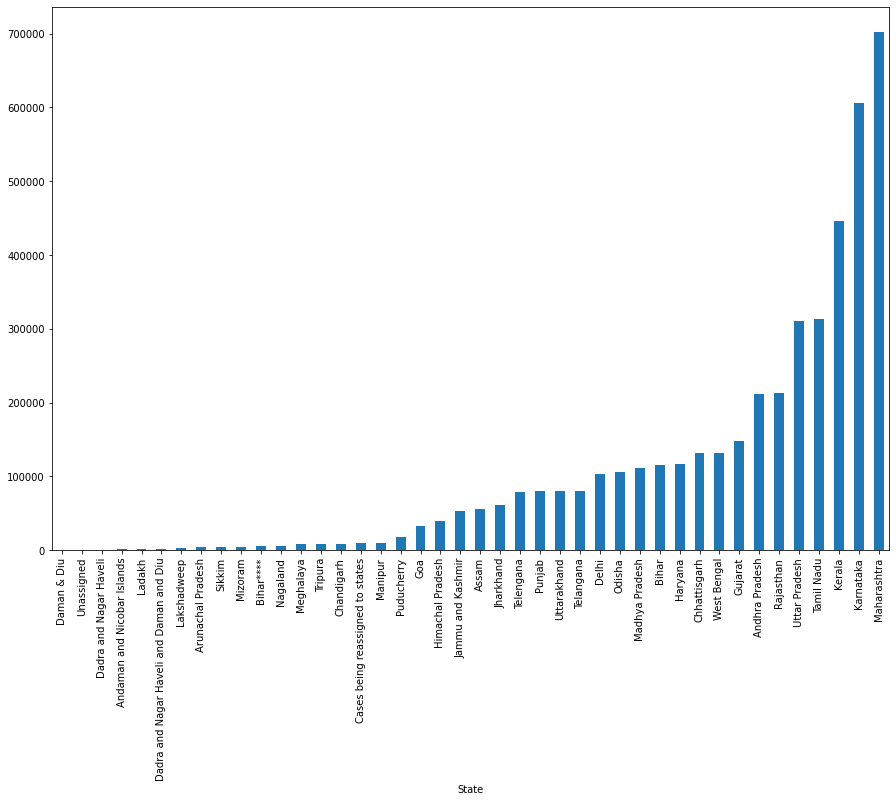

In [55]:
#Active Individuals
Active_Indi = df_India.groupby("State").Active.max().sort_values()

Active_Indi.plot(kind='bar',figsize=(15,10))

In [66]:
#Changing data type from object to date

df_India.Date =  pd.to_datetime(df_India.Date, dayfirst=True)

In [95]:
#TimeSlab wise Analysis of first Wave
FirstWave = df_India.set_index("Date").loc["2020-01-2" : "2020-12-30" ]
FirstWave.head()

,Sno,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active
Date,,,,,,,,,
2020-01-30,1,6:00 PM,Kerala,1,0,0,0,1,1
2020-01-31,2,6:00 PM,Kerala,1,0,0,0,1,1
2020-02-01,3,6:00 PM,Kerala,2,0,0,0,2,2
2020-02-02,4,6:00 PM,Kerala,3,0,0,0,3,3
2020-02-03,5,6:00 PM,Kerala,3,0,0,0,3,3


<AxesSubplot:xlabel='State'>

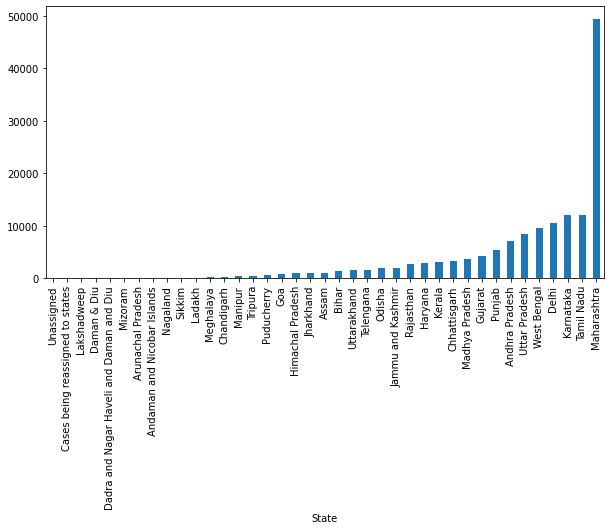

In [94]:
#Deathtoll in first wave

FirstWave.groupby('State').Deaths.max().sort_values().plot(kind="bar", figsize=(10,5))

<AxesSubplot:xlabel='State'>

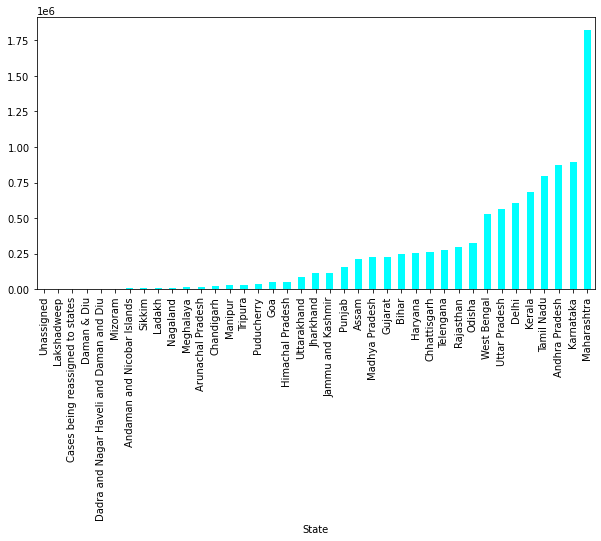

In [181]:
#Cured Individuasls in first wave

FirstWave.groupby('State').Cured.max().sort_values().plot(kind="bar", figsize=(10,5),color='cyan')

In [97]:
#TimeSlab Wise analysis of second Wave

SecondWave = df_India.set_index('Date').loc["2021-01-01" : "2021-07-07"]
SecondWave.head()


,Sno,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active
Date,,,,,,,,,
2021-01-01,10083,8:00 AM,Andhra Pradesh,-,-,871916,7108,882286,3262
2021-01-01,10084,8:00 AM,Andaman and Nicobar Islands,-,-,4826,62,4945,57
2021-01-01,10085,8:00 AM,Arunachal Pradesh,-,-,16564,56,16719,99
2021-01-01,10086,8:00 AM,Assam,-,-,211910,1045,216211,3256
2021-01-01,10087,8:00 AM,Bihar,-,-,245476,1397,251743,4870


<AxesSubplot:xlabel='State'>

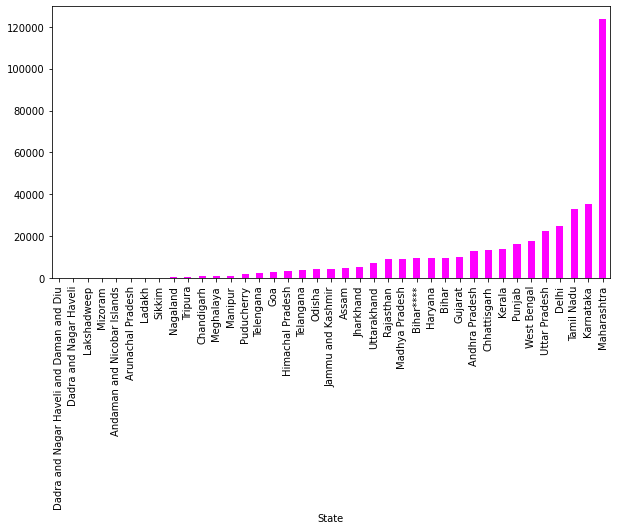

In [180]:
#Death toll in second wave
SecondWave.groupby('State').Deaths.max().sort_values().plot(kind="bar", figsize=(10,5),color='magenta')

<AxesSubplot:xlabel='State'>

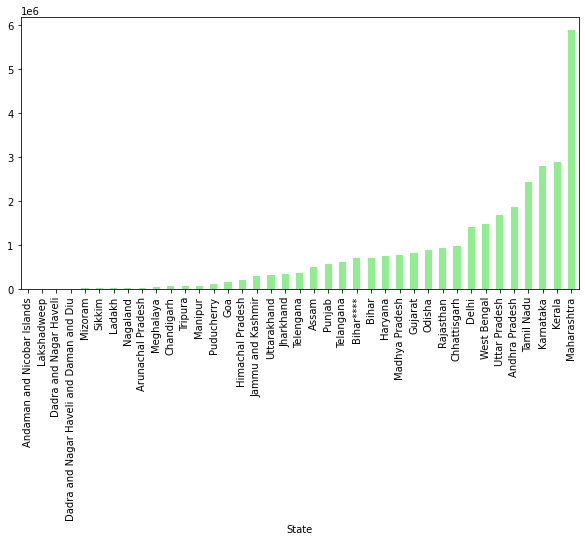

In [178]:
#Cured Individuals in Second Wave
SecondWave.groupby('State').Cured.max().sort_values().plot(kind="bar", figsize=(10,5),color='lightgreen')

<AxesSubplot:xlabel='State'>

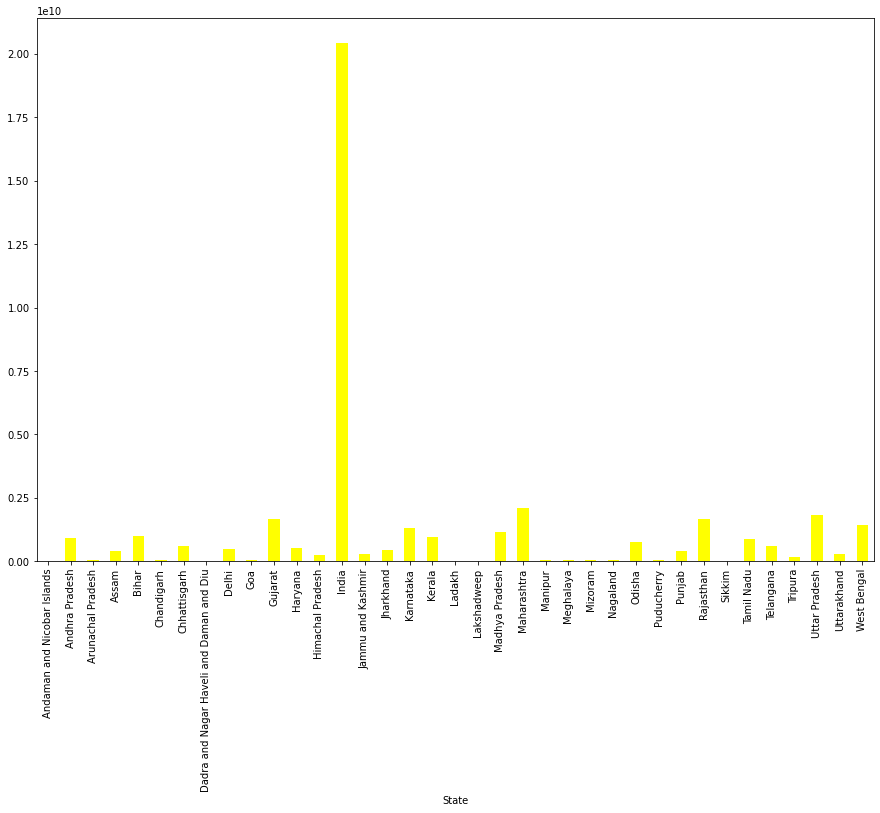

In [179]:
#Total doses Administered

df_Tvaccine.rename(columns={'Total Doses Administered' : 'TDA'},inplace =True)
df_Tvaccine.groupby(["State"]).TDA.sum().plot(kind="bar",figsize=(15,10),color='yellow')


<AxesSubplot:xlabel='State'>

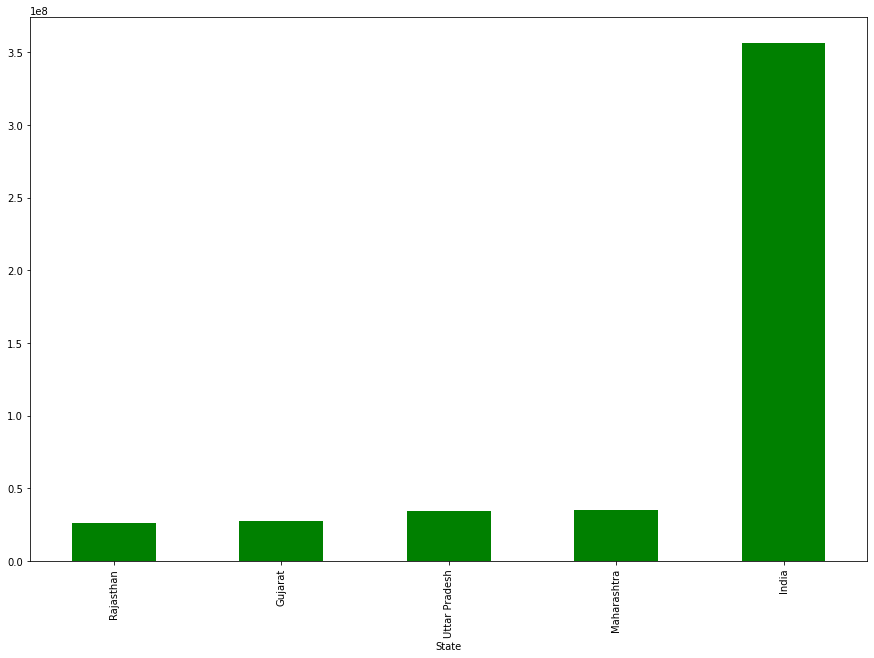

In [175]:
#Top 5 States Vaccinated
topDA= df_Tvaccine.groupby("State").TDA.max().sort_values().tail(5)
topDA.plot(kind="bar",figsize=(15,10),color='Green')

<AxesSubplot:xlabel='State'>

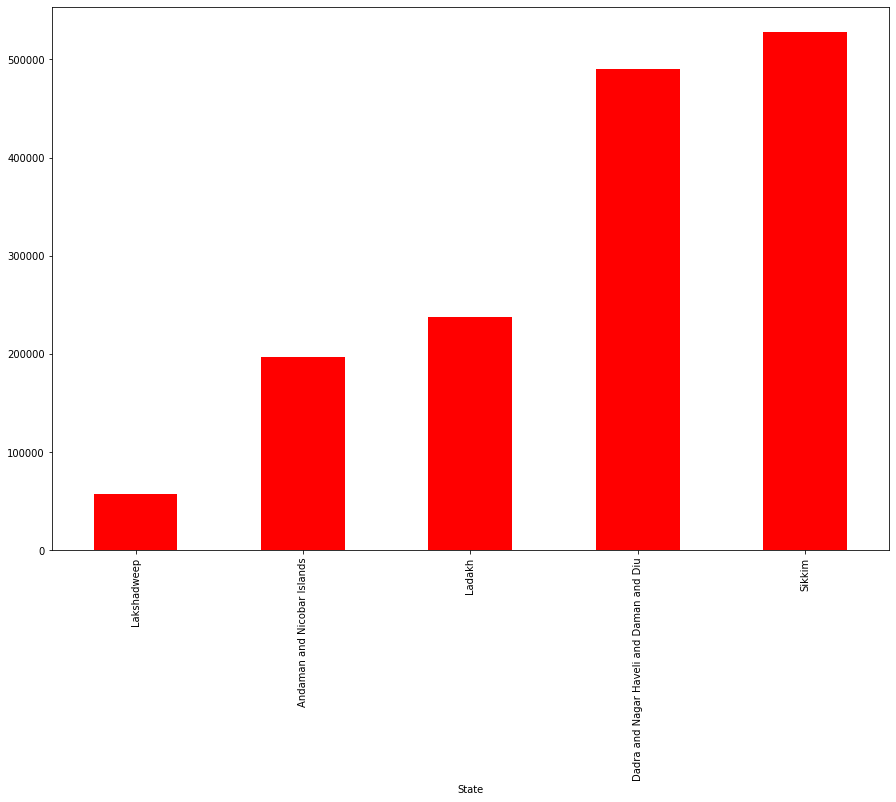

In [174]:
#Bottom 5 Vaccinated state 
topDA= df_Tvaccine.groupby("State").TDA.max().sort_values().head(5)
topDA.plot(kind="bar",figsize=(15,10), color='red')

In [171]:
#Positivity rate
df_state["PositivityRate"] = (df_state.Positive*100) /df_state.TotalSamples




0        1210
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
14655     568
14656     NaN
14657     NaN
14658     NaN
14659     NaN
Name: Negative, Length: 180, dtype: object

<AxesSubplot:xlabel='State'>

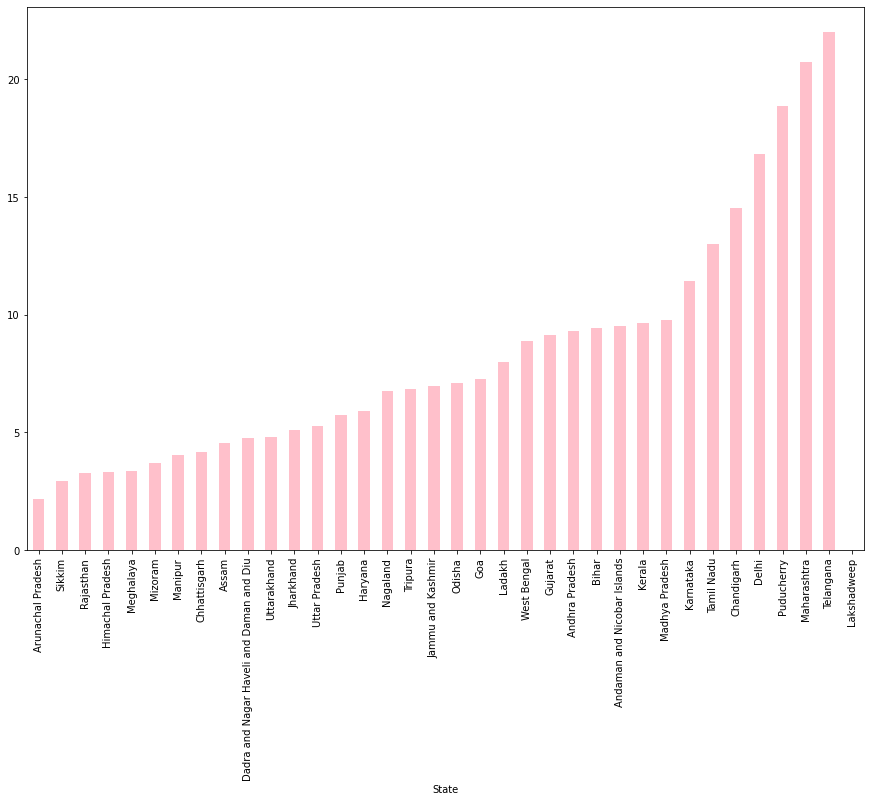

In [177]:
Positive_Srate = df_state.groupby("State").PositivityRate.max().sort_values()

Positive_Srate.plot(kind='bar',figsize=(15,10), color = 'pink')